# Advanced Regression Assignment

## Step 1: Importing the Libraries and Understanding the data

### Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings


from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)
sns.set_style('darkgrid')

In [3]:
data_d = pd.read_csv('train (1).csv')

### Understanding the data

In [4]:
data_d.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
data_d.shape

(1460, 81)

In [6]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data_d.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [8]:
data_d.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
(data_d.isna().sum() >=0.5 * data_d.shape[0]).sum()

4

There are four columns which have more than 50% of the null values, So I will be dropping those columns

In [10]:
column_names = data_d.columns[data_d.isna().sum() <= 0.50 * data_d.shape[0]].tolist()
data_df = data_d[column_names]
del data_d
data_df.sample(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
516    517          80       RL          NaN    10448   Pave      IR1   
1050  1051          20       RL         73.0     8993   Pave      IR1   
411    412         190       RL        100.0    34650   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
516          Lvl    AllPub    Corner       Gtl       NWAmes       Norm   
1050         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
411          Bnk    AllPub    Inside       Gtl      Gilbert       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
516        Norm     1Fam       SLvl            6            6       1972   
1050       Norm     1Fam     1Story            7            5       2007   
411        Norm   2fmCon     1Story            5            5       1955   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
516           1972     Gable  CompShg     HdBoard     HdBoard    BrkFace   
1050          2007     Gable  CompShg     VinylSd     VinylSd       None   
411           1955       Hip  CompShg     Wd Sdng     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
516        333.0        TA        TA     CBlock       TA       TA   
1050         0.0        Gd        TA      PConc       Gd       TA   
411          0.0        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
516            No          Unf           0          Unf           0   
1050           Av          Unf           0          Unf           0   
411            Mn          Rec        1056          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
516         689          689    GasA        TA          Y      SBrkr   
1050       1302         1302    GasA        Ex          Y      SBrkr   
411           0         1056    GasA        TA          N      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
516       1378       741             0       2119             0             0   
1050      1302         0             0       1302             0             0   
411       1056         0             0       1056             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
516          2         1             3             1          TA   
1050         2         0             3             1          Gd   
411          1         0             3             1          TA   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
516              7        Typ           1          TA     Attchd       1972.0   
1050             6        Typ           0         NaN     Attchd       2007.0   
411              5        Typ           0         NaN     Attchd       1955.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
516           RFn           2         583         TA         TA          Y   
1050          Fin           2         436         TA         TA          Y   
411           Fin           2         572         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
516            0          104              0          0            0   
1050           0           22              0          0            0   
411          264            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
516          0        0       8    2009      COD       Abnorml     158000  
1050         0        0       8    2007      New       Partial     176485  
411          0        0       1    2006       WD        Normal     145000

In [11]:
data_df.shape

(1460, 77)

In [12]:
data_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [13]:
data_df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [14]:
data_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [15]:
data_df.LotFrontage = data_df.groupby('Neighborhood').LotFrontage.apply(lambda x: x.fillna(x.median()))

In [16]:
data_df['LotFrontage'].isna().sum()

0

In [17]:
# Replacing the NaN values to NA as mentioned in the data dictionary.

data_df['BsmtQual'] = data_df['BsmtQual'].replace(np.NaN, 'NA')
data_df['BsmtCond'] = data_df['BsmtCond'].replace(np.NaN, 'NA')
data_df['BsmtExposure'] = data_df['BsmtExposure'].replace(np.NaN, 'NA')
data_df['BsmtFinType1'] = data_df['BsmtFinType1'].replace(np.NaN, 'NA')
data_df['BsmtFinType2'] = data_df['BsmtFinType2'].replace(np.NaN, 'NA')

In [18]:
data_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [19]:
# Using the similar method to replace values the in the following columns
#FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, Garagecond

data_df['FireplaceQu'] = data_df['FireplaceQu'].replace(np.NaN, 'NA')

data_df['GarageType'] = data_df['GarageType'].replace(np.NaN,'NA')
data_df['GarageYrBlt'] = data_df['GarageYrBlt'].replace(np.NaN, 0.0)
data_df['GarageFinish'] = data_df['GarageFinish'].replace(np.NaN,'NA')
data_df['GarageQual'] = data_df['GarageQual'].replace(np.NaN, 'NA')
data_df['GarageCond'] = data_df['GarageCond'].replace(np.NaN,'NA')

In [20]:
data_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
MasVnrArea       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [21]:
data_df['MasVnrType'] = data_df['MasVnrType'].replace(np.NaN, 'None')
data_df['MasVnrArea'] = data_df['MasVnrArea'].replace(np.NaN,0.0)

In [22]:
data_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [23]:
data_df = data_df[-data_df['Electrical'].isna()]

In [24]:
data_df.shape

(1459, 77)

In [25]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [26]:
data_df['YearBuilt'] = 2023 - data_df['YearBuilt']
data_df['YearRemodAdd'] = 2023 - data_df['YearRemodAdd']
data_df['GarageYrBlt'] = 2023 - data_df['GarageYrBlt']
data_df['YrSold'] = 2023 - data_df['YrSold']

### Visualising the Existing data

In [27]:
data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5         20            20     Gable   
1     1Story            6            8         47            47     Gable   
2     2Story            7            5         22            21     Gable   
3     2Story            7            5        108            53     Gable   
4     2Story            8            5         23            23     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          NA     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [28]:
data_df  = data_df.drop(['Id'],axis=1)

In [29]:
data_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [30]:
data_cat =  data_df.select_dtypes(include = ['object'])
data_cat

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1455  CompShg     VinylSd     VinylSd       None        TA        TA   
1456  CompShg     Plywood     Plywood      Stone        TA        TA   
1457  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1458  CompShg     MetalSd     MetalSd       None        TA        TA   
1459  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1455      PConc       Gd       TA           No          Unf          Unf   
1456     CBlock       Gd       TA           No          ALQ          Rec   
1457      Stone       TA       Gd           No          GLQ          Unf   
1458     CBlock       TA       TA           Mn          GLQ          Rec   
1459     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

In [31]:
data_num  = data_df.select_dtypes(include=['float64','int64'])
data_num

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5         20   
1             20         80.0     9600            6            8         47   
2             60         68.0    11250            7            5         22   
3             70         60.0     9550            7            5        108   
4             60         84.0    14260            8            5         23   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5         24   
1456          20         85.0    13175            6            6         45   
1457          70         66.0     9042            7            9         82   
1458          20         68.0     9717            5            6         73   
1459          20         75.0     9937            5            6         58   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0               20       196.0         706           0        150   
1               47         0.0         978           0        284   
2               21       162.0         486           0        434   
3               53         0.0         216           0        540   
4               23       350.0         655           0        490   
...            ...         ...         ...         ...        ...   
1455            23         0.0           0           0        953   
1456            35       119.0         790         163        589   
1457            17         0.0         275           0        877   
1458            27         0.0          49        1029          0   
1459            58         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0         20.0           2         548   
1                6           1         47.0           2         460   
2                6           1         22.0           2         608   
3                7           1         25.0           3         642   
4                9           1         23.0           3         836   


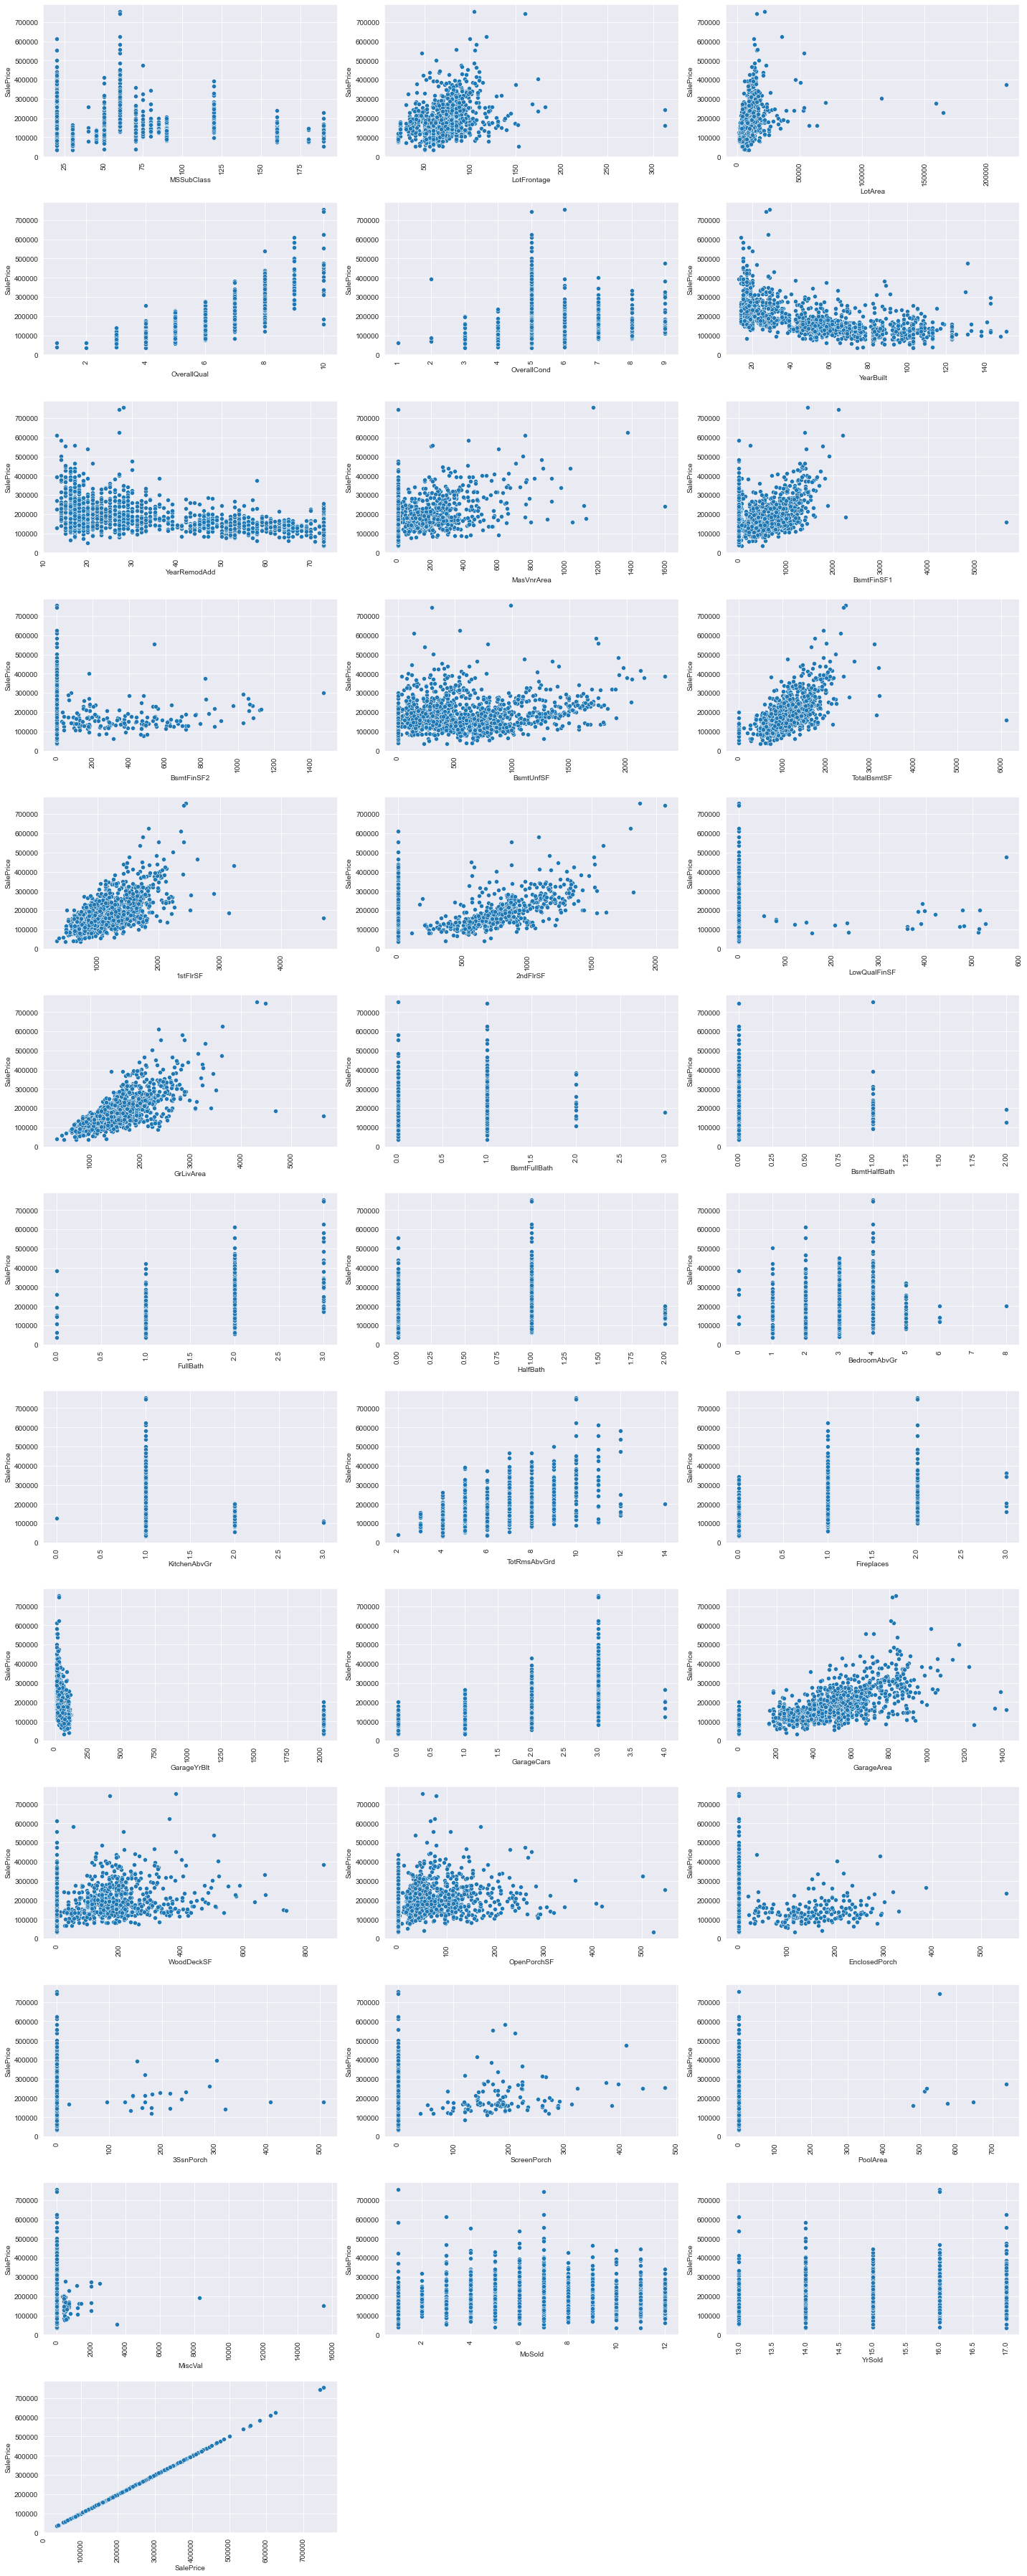

In [32]:
## making pairplots to identify trends 
numeric = data_num.columns
plt.figure(figsize = (20,50))
i = 1
for x in numeric :
    plt.subplot(len(numeric)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=x,data=data_num)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()

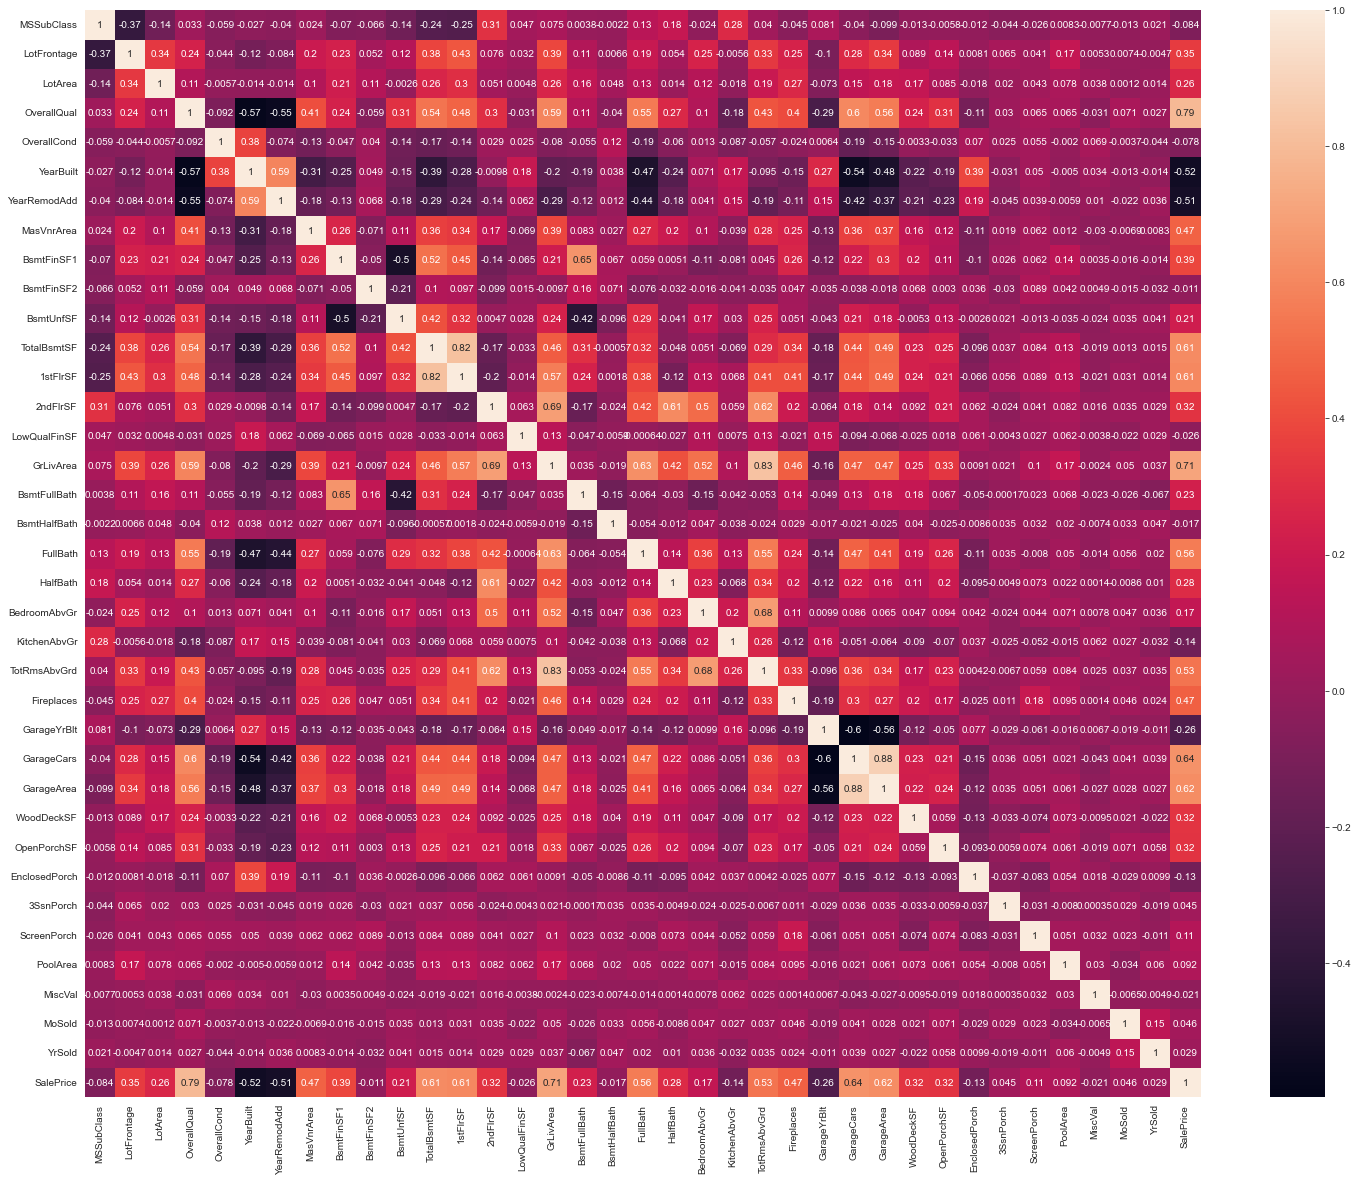

In [33]:
plt.figure(figsize=(25,20))
sns.heatmap(data_num.corr(), annot= True)
plt.show()

The columns "OverallQual" , "GrLivArea" , "GarageCars" ,"GarageArea", "TotalBsmntSF" , "1stFlrSF" are highly correlateed with the "SalePrice" column. 

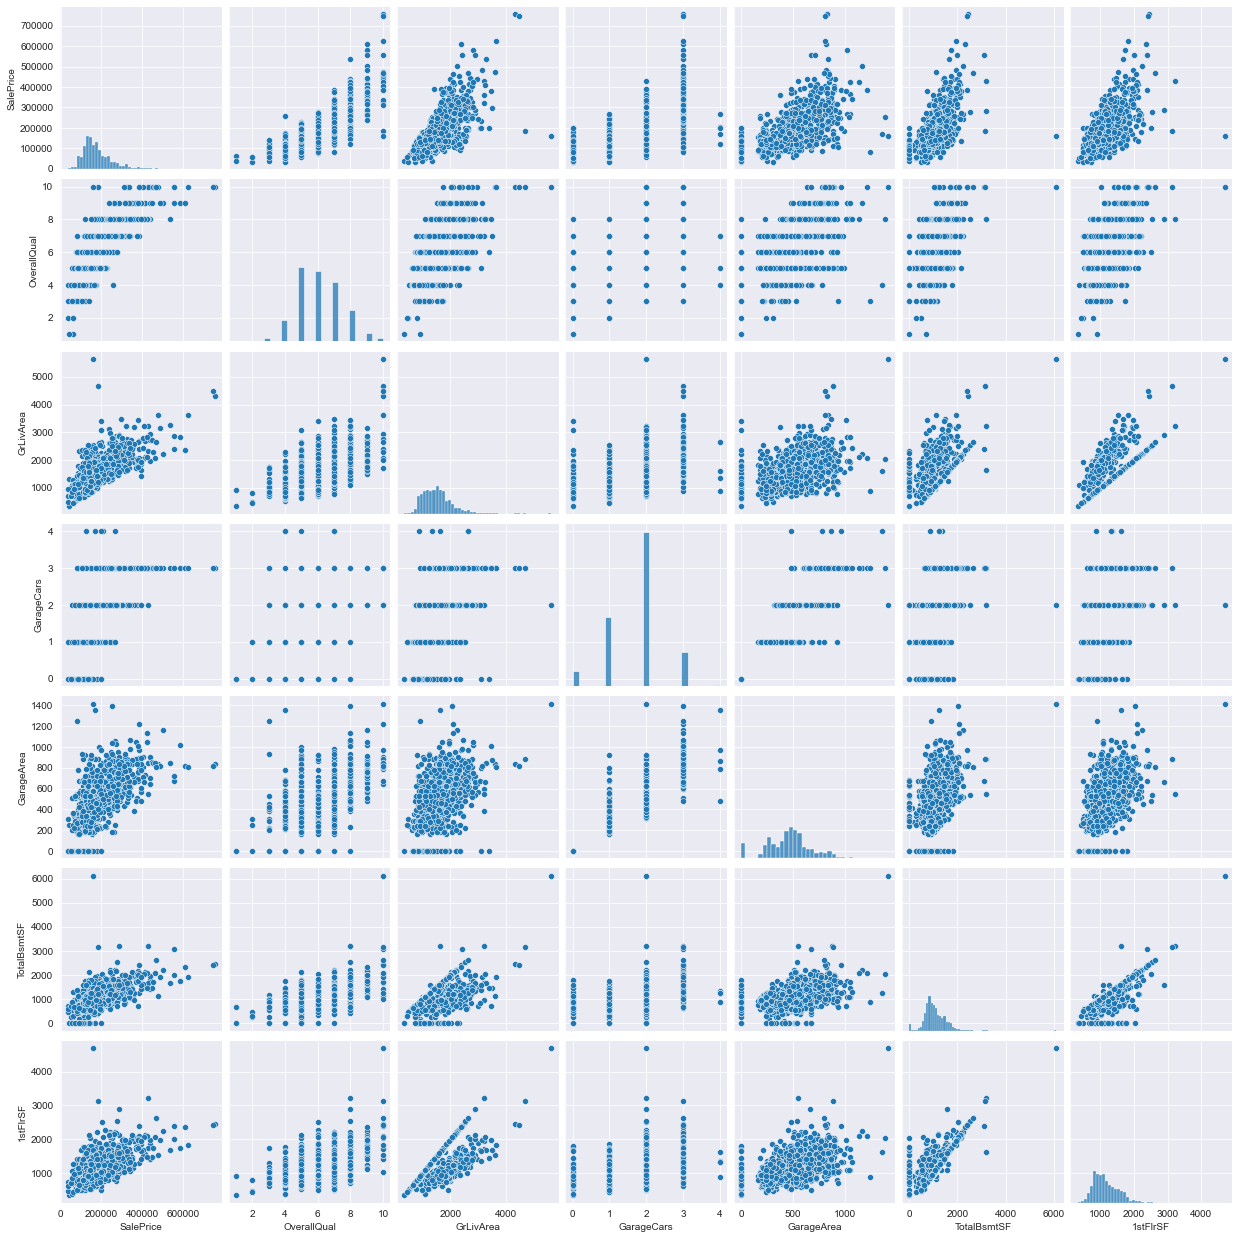

In [34]:
#Now we will see a pairplot among these variables 
col = ["SalePrice","OverallQual" , "GrLivArea" , "GarageCars" ,"GarageArea", "TotalBsmtSF" , "1stFlrSF"]
sns.pairplot(data_df[col])
plt.show()

### Visualizing the Categorical Columns

In [35]:
data_cat.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ          NA     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
0          RFn         TA         TA          Y       WD        Normal  
1          RFn         TA         TA          Y       WD        Normal  
2          RFn         TA         TA          Y       WD        Normal  
3          Unf         TA         TA          Y       WD       Abnorml  
4          RFn         TA         TA          Y       WD        Normal

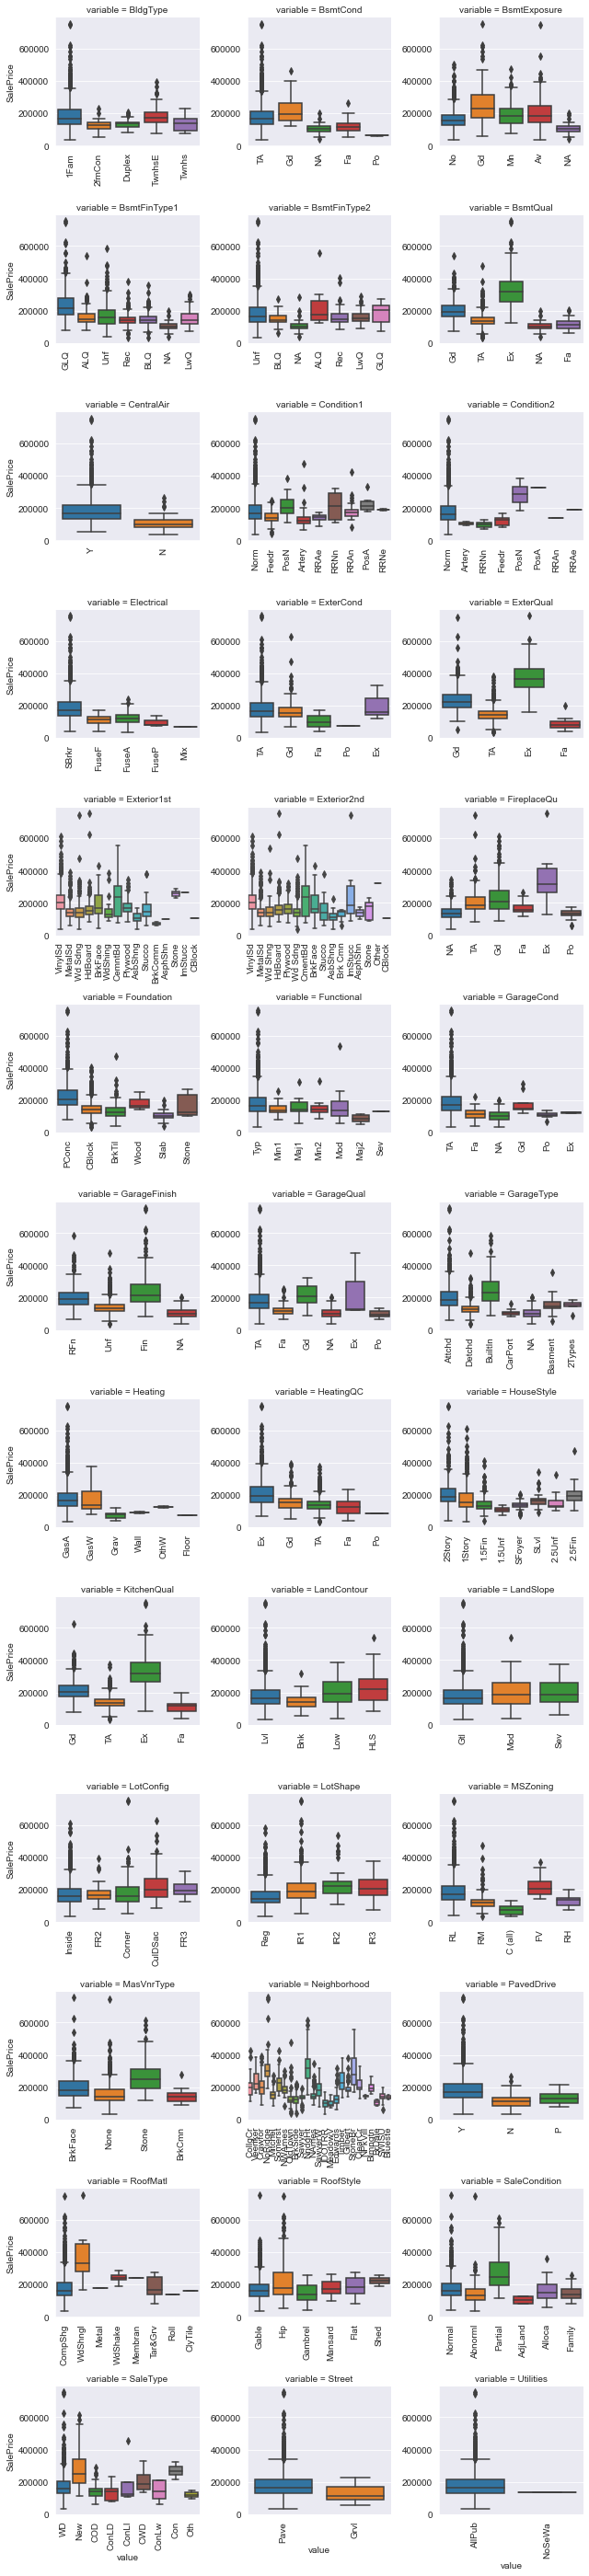

In [36]:
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

data_df = data_df.reset_index()    
categorical = data_df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(data_df, id_vars=['SalePrice'], value_vars=sorted(data_df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

There are a few outliers which we handle in the feature engineering section by capping them to a lower percentile.
From the above box plots we see that:-
- Paved alleys properties demand a higher price.
- Houses where the basement quality is good and excellent are sold at higher prices compared to others.
- Houses with good and excelent garages are sold at higher prices.
- Houses with good quality kitchens also impact the price in a postive way.

In [37]:
data_df['Utilities'].value_counts()

AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64

In [38]:
data_df['PoolArea'].value_counts()

0      1452
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [39]:
data_df.nunique()

index            1459
MSSubClass         15
MSZoning            5
LotFrontage       115
LotArea          1072
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          752
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

We will be removing the features which have more than 99% same values

In [40]:
# Trying to remove redundant features
def red_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

feature_remove = red_feature(data_df)
feature_remove

['Street', 'Utilities', 'PoolArea']

In [41]:
data_cat =  data_df.select_dtypes(include = ['object'])
data_cat

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1454       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1454      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1455       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1456      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1457        NAmes       Norm       Norm     1Fam     1Story       Hip   
1458      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1454  CompShg     VinylSd     VinylSd       None        TA        TA   
1455  CompShg     Plywood     Plywood      Stone        TA        TA   
1456  CompShg     CemntBd     CmentBd       None        Ex        Gd   
1457  CompShg     MetalSd     MetalSd       None        TA        TA   
1458  CompShg     HdBoard     HdBoard       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1454      PConc       Gd       TA           No          Unf          Unf   
1455     CBlock       Gd       TA           No          ALQ          Rec   
1456      Stone       TA       Gd           No          GLQ          Unf   
1457     CBlock       TA       TA           Mn          GLQ          Rec   
1458     CBlock       TA       TA           No          BLQ          LwQ   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

In [42]:
data_df.shape

(1459, 77)

Once we checked the boxplots of the categorical variables we understood that there are outliers in the data, so now we will be removing them

In [43]:
def removing_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
data_df2 = removing_outliers(data_df)
data_df2.shape

(1454, 77)

In [44]:
data_df2.isna().sum()

index            0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## STEP 3 Creating the Dummy Variables 

In [45]:
cat_dum  = pd.get_dummies(data_df2, drop_first=True)
cat_dum.head()

index  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0      0          60         65.0     8450            7            5   
1      1          20         80.0     9600            6            8   
2      2          60         68.0    11250            7            5   
3      3          70         60.0     9550            7            5   
4      4          60         84.0    14260            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         20            20       196.0         706           0        150   
1         47            47         0.0         978           0        284   
2         22            21       162.0         486           0        434   
3        108            53         0.0         216           0        540   
4         23            23       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0         20.0           2         548           0           61   
1           1         47.0           2         460         298            0   
2           1         22.0           2         608           0           42   
3           1         25.0           3         642           0           35   
4           1         23.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2      15   
1              0          0            0         0        0       5      16   
2              0          0            0         0        0       9      15   
3            272          0            0         0        0       2      17   
4              0          0            0         0        0      12      15   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0     208500            0            0            1            0            1   
1     181500            0            0            1            0            1   
2     223500            0            0            1            0            1   
3     140000            0            0            1            0            1   
4     250000            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2          

In [46]:
cat_dum.shape

(1454, 247)

In [47]:
cat_dum.isna().sum()

index                    0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
S

In [48]:
data_df2.isna().sum()

index            0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

Separating the target variable from the dataframe

## STEP 4 Feature scaling and Train-Test Split

In [49]:
data_df2 =  pd.concat([data_df2,cat_dum], axis =1) 



In [50]:
col = data_cat.columns
data_df2 = data_df2.drop(col,axis=1)
data_df2.shape
data_df2.isna().sum()

index                    0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
S

In [51]:
y = data_df2.pop('SalePrice')
X = data_df2

In [52]:
X.isna().sum()

index                    0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
i

In [97]:
#X.drop(['index'],axis=1,inplace=True)
X = X.T.drop_duplicates().T
X

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0           60.0         65.0   8450.0          7.0          5.0       20.0   
1           20.0         80.0   9600.0          6.0          8.0       47.0   
2           60.0         68.0  11250.0          7.0          5.0       22.0   
3           70.0         60.0   9550.0          7.0          5.0      108.0   
4           60.0         84.0  14260.0          8.0          5.0       23.0   
...          ...          ...      ...          ...          ...        ...   
1454        60.0         62.0   7917.0          6.0          5.0       24.0   
1455        20.0         85.0  13175.0          6.0          6.0       45.0   
1456        70.0         66.0   9042.0          7.0          9.0       82.0   
1457        20.0         68.0   9717.0          5.0          6.0       73.0   
1458        20.0         75.0   9937.0          5.0          6.0       58.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             20.0       196.0       706.0         0.0      150.0   
1             47.0         0.0       978.0         0.0      284.0   
2             21.0       162.0       486.0         0.0      434.0   
3             53.0         0.0       216.0         0.0      540.0   
4             23.0       350.0       655.0         0.0      490.0   
...            ...         ...         ...         ...        ...   
1454          23.0         0.0         0.0         0.0      953.0   
1455          35.0       119.0       790.0       163.0      589.0   
1456          17.0         0.0       275.0         0.0      877.0   
1457          27.0         0.0        49.0      1029.0        0.0   
1458          58.0         0.0       830.0       290.0      136.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           856.0     856.0     854.0           0.0     1710.0           1.0   
1          1262.0    1262.0       0.0           0.0     1262.0           0.0   
2           920.0     920.0     866.0           0.0     1786.0           1.0   
3           756.0     961.0     756.0           0.0     1717.0           1.0   
4          1145.0    1145.0    1053.0           0.0     2198.0           1.0   
...           ...       ...       ...           ...        ...           ...   
1454        953.0     953.0     694.0           0.0     1647.0           0.0   
1455       1542.0    2073.0       0.0           0.0     2073.0           1.0   
1456       1152.0    1188.0    1152.0           0.0     2340.0           0.0   
1457       1078.0    1078.0       0.0           0.0     1078.0           1.0   
1458       1256.0    1256.0       0.0           0.0     1256.0           1.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0       2.0       1.0           3.0           1.0   
1              1.0       2.0       0.0           3.0           1.0   
2              0.0       2.0       1.0           3.0           1.0   
3              0.0       1.0       0.0           3.0           1.0   
4              0.0       2.0       1.0           4.0           1.0   
...            ...       ...       ...           ...           ...   
1454           0.0       2.0       1.0           3.0           1.0   
1455           0.0       2.0       0.0           3.0           1.0   
1456           0.0       2.0       0.0           4.0           1.0   
1457           0.0       1.0       0.0           2.0           1.0   
1458           0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0              8.0         0.0         20.0         2.0       548.0   
1              6.0         1.0         47.0         2.0       460.0   
2              6.0         1.0         22.0         2.0       608.0   
3              7.0         1.0         25.0         3.0       642.0   
4              9.0         1.0         23.0         3.0       836.0   


In [54]:
y= y.T.drop_duplicates().T
y

SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1454     175000
1455     210000
1456     266500
1457     142125
1458     147500

[1454 rows x 1 columns]

In [55]:
y= pd.DataFrame(y, columns=['SalePrice'])
y

SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1454     175000
1455     210000
1456     266500
1457     142125
1458     147500

[1454 rows x 1 columns]

In [98]:
np.random.seed(0)
X_train , X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state =100)

In [99]:
X_train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1306       120.0         48.0   6955.0          7.0          5.0       18.0   
368         20.0         78.0   7800.0          5.0          6.0       69.0   
309         20.0         90.0  12378.0          9.0          5.0       20.0   
659         20.0         75.0   9937.0          5.0          7.0       59.0   
727         20.0         64.0   7314.0          7.0          5.0       16.0   
...          ...          ...      ...          ...          ...        ...   
806         80.0         75.0   9750.0          5.0          5.0       56.0   
53          20.0         68.0  50271.0          9.0          5.0       42.0   
353         30.0         60.0   8520.0          6.0          8.0       95.0   
79          50.0         60.0  10440.0          5.0          6.0      113.0   
796         20.0         71.0   8197.0          6.0          5.0       46.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1306          17.0        94.0         0.0         0.0     1368.0   
368           69.0       200.0       540.0         0.0      728.0   
309           19.0         0.0      1274.0         0.0      622.0   
659           24.0         0.0       637.0         0.0      849.0   
727           16.0        82.0       724.0         0.0      508.0   
...            ...         ...         ...         ...        ...   
806           56.0         0.0       400.0       480.0      100.0   
53            36.0         0.0      1810.0         0.0       32.0   
353           20.0         0.0         0.0         0.0      624.0   
79            42.0         0.0         0.0         0.0      440.0   
796           46.0       148.0         0.0         0.0      660.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1306       1368.0    1368.0       0.0           0.0     1368.0           0.0   
368        1268.0    1268.0       0.0           0.0     1268.0           0.0   
309        1896.0    1944.0       0.0           0.0     1944.0           1.0   
659        1486.0    1486.0       0.0           0.0     1486.0           1.0   
727        1232.0    1232.0       0.0           0.0     1232.0           1.0   
...           ...       ...       ...           ...        ...           ...   
806         980.0     980.0       0.0           0.0      980.0           0.0   
53         1842.0    1842.0       0.0           0.0     1842.0           2.0   
353         624.0     720.0       0.0           0.0      720.0           0.0   
79          440.0     682.0     548.0           0.0     1230.0           0.0   
796         660.0    1285.0       0.0           0.0     1285.0           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1306           0.0       2.0       0.0           2.0           1.0   
368            0.0       1.0       0.0           2.0           1.0   
309            0.0       2.0       0.0           3.0           1.0   
659            0.0       1.0       0.0           3.0           1.0   
727            0.0       2.0       0.0           2.0           1.0   
...            ...       ...       ...           ...           ...   
806            0.0       2.0       0.0           3.0           1.0   
53             0.0       0.0       1.0           0.0           1.0   
353            0.0       1.0       0.0           2.0           1.0   
79             0.0       1.0       1.0           2.0           1.0   
796            0.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
1306           6.0         1.0         18.0         2.0       474.0   
368            7.0         1.0         69.0         1.0       244.0   
309            8.0         3.0         20.0         3.0       708.0   
659            7.0         0.0         55.0         2.0       480.0   
727            6.0         0.0         16.0         2.0       632.0   


In [100]:
X_test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
530         80.0         85.0  10200.0          6.0          5.0       35.0   
434        180.0         21.0   1890.0          4.0          7.0       51.0   
1030       190.0         60.0   7082.0          5.0          8.0      107.0   
672         20.0         68.0  11250.0          6.0          6.0       46.0   
1185        50.0         60.0   9738.0          5.0          7.0       99.0   
587         85.0         74.0   8740.0          5.0          6.0       41.0   
57          60.0         89.0  11645.0          7.0          5.0       19.0   
719         20.0         69.0   9920.0          5.0          6.0       54.0   
347         20.0         73.0  17600.0          6.0          5.0       63.0   
1393       120.0         53.0   4045.0          7.0          5.0       17.0   
707        120.0         48.0   6240.0          8.0          5.0       17.0   
1435        20.0         60.0   9000.0          4.0          6.0       52.0   
1377        50.0         60.0  10998.0          5.0          5.0       82.0   
670         60.0         64.0   8633.0          6.0          5.0       18.0   
938         60.0         73.0   8760.0          7.0          5.0       17.0   
704         20.0         70.0   8400.0          7.0          5.0       19.0   
223         20.0         70.0  10500.0          4.0          6.0       52.0   
1016        20.0         73.0  11883.0          7.0          5.0       27.0   
1093        20.0         71.0   9230.0          5.0          8.0       58.0   
169         20.0         85.0  16669.0          8.0          6.0       42.0   
629         80.0         82.0   9020.0          6.0          5.0       59.0   
1339        20.0        120.0   9560.0          5.0          7.0       51.0   
834         20.0         75.0   7875.0          5.0          6.0       62.0   
185         75.0         90.0  22950.0         10.0          9.0      131.0   
936         20.0         67.0  10083.0          7.0          5.0       20.0   
12          20.0         71.0  12968.0          5.0          6.0       61.0   
139         60.0         65.0  15426.0          6.0          5.0       26.0   
200         20.0         80.0   8546.0          4.0          5.0       20.0   
450         30.0         70.0   5684.0          6.0          8.0       93.0   
1294        20.0         60.0   8172.0          5.0          7.0       68.0   
1390        90.0         65.0   8944.0          5.0          5.0       56.0   
886         90.0         70.0   8393.0          5.0          5.0       64.0   
1129        90.0         60.0   7200.0          5.0          5.0       43.0   
632         20.0         85.0  11900.0          7.0          5.0       46.0   
1096        70.0         60.0   6882.0          6.0          7.0      109.0   
776         20.0         86.0  11210.0          7.0          5.0       18.0   
974         70.0         60.0  11414.0          7.0          8.0      113.0   
30          70.0         50.0   8500.0          4.0          4.0      103.0   
825         20.0        114.0  14803.0         10.0          5.0       16.0   
1296        20.0         80.0   8700.0          5.0          6.0       60.0   
1221        20.0         55.0   8250.0          5.0          5.0       55.0   
247         20.0         75.0  11310.0          6.0          5.0       69.0   
1360        70.0         51.0   9842.0          5.0          6.0      102.0   
815         20.0         48.0  12137.0          7.0          5.0       25.0   
838         20.0         75.0   9525.0          5.0          6.0       28.0   
723         50.0         60.0   8172.0          4.0          6.0       69.0   
836         30.0         90.0   8100.0          5.0          6.0       75.0   
375         30.0         65.5  10020.0          1.0          1.0      101.0   
1020        20.0         60.0   7024.0          4.0          5.0       18.0   
1456        70.0         66.0   9042.0          7.0     

<AxesSubplot:ylabel='Density'>

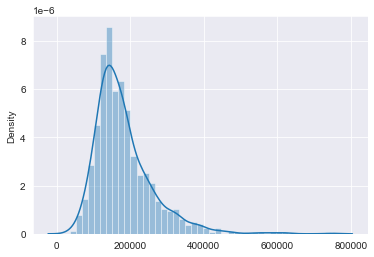

In [101]:

y_train
sns.distplot(y_train)

The data is right Skewed so we transform it to make it more gaussian

<AxesSubplot:ylabel='Density'>

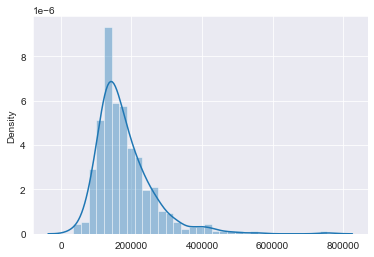

In [102]:

y_test
sns.distplot(y_test)

In [103]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train)
y_test = pt.transform(y_test)

In [104]:
num_value = X_train.select_dtypes(include = ['int64','float64']).columns
num_value

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=239)

In [105]:
scaler = StandardScaler()
X_train[num_value] = scaler.fit_transform(X_train[num_value])
X_test[num_value] = scaler.transform(X_test[num_value])

## STEP 4 Model building using different methods

### Model 1 - Multiple Linear Regression using RFE

In [106]:
X_train.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
MSZoning_FV              0
M

In [107]:
y_train.isna().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [108]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [109]:
rfe = RFE(lm,n_features_to_select= 20)
rfe = rfe.fit(X_train, y_train)

In [110]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 49),
 ('LotFrontage', False, 80),
 ('LotArea', False, 5),
 ('OverallQual', True, 1),
 ('OverallCond', False, 2),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 38),
 ('MasVnrArea', False, 119),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 164),
 ('BsmtHalfBath', False, 216),
 ('FullBath', False, 169),
 ('HalfBath', False, 68),
 ('BedroomAbvGr', False, 135),
 ('KitchenAbvGr', False, 7),
 ('TotRmsAbvGrd', False, 205),
 ('Fireplaces', False, 196),
 ('GarageYrBlt', False, 125),
 ('GarageCars', False, 6),
 ('GarageArea', False, 102),
 ('WoodDeckSF', False, 65),
 ('OpenPorchSF', False, 57),
 ('EnclosedPorch', False, 58),
 ('3SsnPorch', False, 122),
 ('ScreenPorch', False, 54),
 ('PoolArea', False, 150),
 ('MiscVal', False, 220),
 ('MoSold', False, 207),
 ('YrSold', False, 121),
 ('MSZ

In [111]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtCond_Po', 'Electrical_Mix', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [112]:
X_train_final = X_train[col]
X_train_final

OverallQual  YearBuilt  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
1306     0.642607  -1.095361   -0.994503   -0.279325   1.840859     0.791955   
368     -0.817799   0.574384    0.248199   -0.279325   0.368498     0.547907   
309      2.103013  -1.029880    1.937352   -0.279325   0.124638     2.080526   
659     -0.817799   0.246983    0.471425   -0.279325   0.646866     1.079931   
727      0.642607  -1.160841    0.671638   -0.279325  -0.137627     0.460050   
...           ...        ...         ...         ...        ...          ...   
806     -0.817799   0.148763   -0.073983    2.801450  -1.076257    -0.154950   
53       2.103013  -0.309598    3.170848   -0.279325  -1.232695     1.948741   
353     -0.087596   1.425627   -0.994503   -0.279325   0.129239    -1.023759   
79      -0.817799   2.014948   -0.994503   -0.279325  -0.294065    -1.472807   
796     -0.087596  -0.178638   -0.994503   -0.279325   0.212059    -0.935902   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtCond_Po  \
1306  0.580358 -0.805723     -0.103462  -0.273420    -0.031373   
368   0.311740 -0.805723     -0.103462  -0.478498    -0.031373   
309   2.127598 -0.805723     -0.103462   0.907825    -0.031373   
659   0.897327 -0.805723     -0.103462  -0.031429    -0.031373   
727   0.215037 -0.805723     -0.103462  -0.552325    -0.031373   
...        ...       ...           ...        ...          ...   
806  -0.461881 -0.805723     -0.103462  -1.069120    -0.031373   
53    1.853608 -0.805723     -0.103462   0.698646    -0.031373   
353  -1.160288 -0.805723     -0.103462  -1.602321    -0.031373   
79   -1.262363  0.474249     -0.103462  -0.556427    -0.031373   
796   0.357405 -0.805723     -0.103462  -0.443634    -0.031373   

      Electrical_Mix  GarageQual_Fa  GarageQual_Gd  GarageQual_Po  \
1306       -0.031373       -0.18879      -0.104568       -0.04439   
368        -0.031373       -0.18879      -0.104568       -0.04439   
309        -0.031373       -0.18879      -0.104568       -0.04439   
659        -0.031373       -0.18879      -0.104568       -0.04439   
727        -0.031373       -0.18879      -0.104568       -0.04439   
...              ...            ...            ...            ...   
806        -0.031373       -0.18879      -0.104568       -0.04439   
53         -0.031373       -0.18879      -0.104568       -0.04439   
353        -0.031373       -0.18879      -0.104568       -0.04439   
79         -0.031373       -0.18879      -0.104568       -0.04439   
796        -0.031373       -0.18879      -0.104568       -0.04439   

      GarageQual_TA  GarageCond_Fa  GarageCond_Gd  GarageCond_Po  \
1306       0.324707       -0.15875      -0.077037      -0.077037   
368        0.324707       -0.15875      -0.077037      -0.077037   
309        0.324707       -0.15875      -0.077037      -0.077037   
659        0.324707       -0.15875      -0.077037      -0.077037   
727        0.324707       -0.15875      -0.077037      -0.077037   
...             ...            ...            ...            ...   
806        0.324707       -0.15875      -0.077037      -0.077037   
53         0.324707       -0.15875      -0.077037      -0.077037   
353        0.324707       -0.15875      -0.077037      -0.077037   
79         0.324707       -0.15875      -0.077037      -0.077037   
796        0.324707       -0.15875      -0.077037      -0.077037   

      GarageCond_TA  
1306       0.303931  
368        0.303931  
309        0.303931  
659        0.303931  
727        0.303931  
...             ...  
806        0.303931  
53         0.303931  
353        0.303931  
79         0.303931  
796        0.303931  

[1017 rows x 20 columns]

In [113]:
lm = LinearRegression()
lm.fit(X_train_final,y_train)

LinearRegression()

In [134]:
lm.coef_

array([[ 0.04065002, -0.02401423,  0.01551196,  0.00148423,  0.00010258,
         0.01712328,  0.01493993,  0.01645798, -0.00157172,  0.02571842,
        -0.00196272, -0.00196272,  0.00109724,  0.00504721, -0.00042589,
         0.00718184,  0.00320411,  0.00341383,  0.0021458 ,  0.00679608]])

In [114]:
y_pred_train = lm.predict(X_train_final)
print("r2 score train:",r2_score(y_train, y_pred_train))


y_pred_test = lm.predict(X_test[col])
print('r2 score test:',r2_score(y_test, y_pred_test))


rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1: ',rss1_lr)


rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2: ',rss2_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ',mse_train_lr)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ',mse_test_lr)



r2 score train: 0.8706560428005143
r2 score test: 0.7716595835808402
rss1:  1.8622548997816932
rss2:  1.4601358089479057
MSE train:  0.0018311257618305735
MSE test:  0.0033412718740226674


The model using all of the features is highly overfitting. R2 is negative only when the chosen model does not follow the trend of the data, that is, the fit is worse than a horizontal line. This model is highly problematic. It shows a high score in the training data, but this will be due to the model learning the data and overfitting on the training data.
In the following step, ridge and lasso are applied to compare the result.

## Model 2 Ridge Regression 

Now we will see how the predictions change when we add a penalty. We will use the Ridge and Lasso Regression to determine the same

In [115]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 4
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_final, y_train) 

Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 50}
-0.031674555026838906


In [117]:
alpha1 =50
ridge= Ridge(alpha=alpha1)
ridge.fit(X_train_final, y_train)
ridge.coef_

array([[ 0.03874621, -0.0236478 ,  0.01533803,  0.00128154,  0.0004992 ,
         0.01728248,  0.01500865,  0.01631917, -0.00168657,  0.02563894,
        -0.00191029, -0.00191029,  0.00085362,  0.004856  , -0.00042774,
         0.00708157,  0.00277739,  0.00325361,  0.00186821,  0.00681722]])

In [118]:
y_pred_train = ridge.predict(X_train_final)
print("r2 score train:",r2_score(y_train, y_pred_train))


y_pred_test = ridge.predict(X_test[col])
print('r2 score test:',r2_score(y_test, y_pred_test))


rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1: ',rss1_lr)


rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2: ',rss2_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ',mse_train_lr)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ',mse_test_lr)



r2 score train: 0.870344834392195
r2 score test: 0.7730232012194498
rss1:  1.8667355836558714
rss2:  1.4514160782271217
MSE train:  0.001835531547350906
MSE test:  0.0033213182568126356


Now we will also check the Lasso Regression Model, as it also helps in feature reduction

### Model 3: Lasso Regression

In [119]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_final, y_train) 

Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [120]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [121]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_final, y_train) 

Lasso(alpha=0.001)

In [122]:
lasso.coef_

array([ 0.04104867, -0.02275458,  0.0146565 ,  0.00032271, -0.        ,
        0.01738   ,  0.00048432,  0.        , -0.00255363,  0.04402299,
       -0.00274936, -0.        ,  0.00070568,  0.00436906, -0.        ,
        0.00767116,  0.00044828,  0.00162827,  0.        ,  0.00367776])

In [123]:
y_pred_train = lasso.predict(X_train_final)
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8696185055457538
0.7731607745126601
27035.708833949135
5330.072347896639
0.0018458142036966356
0.0033193051669600866


In [124]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_train_final.columns

lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]
lasso_df

Coeff Values      Variables
0       0.041049    OverallQual
1      -0.022755      YearBuilt
2       0.014656     BsmtFinSF1
3       0.000323     BsmtFinSF2
5       0.017380    TotalBsmtSF
6       0.000484       1stFlrSF
8      -0.002554   LowQualFinSF
9       0.044023      GrLivArea
10     -0.002749    BsmtCond_Po
12      0.000706  GarageQual_Fa
13      0.004369  GarageQual_Gd
15      0.007671  GarageQual_TA
16      0.000448  GarageCond_Fa
17      0.001628  GarageCond_Gd
19      0.003678  GarageCond_TA

In [125]:
#Displaing the co-efficients of the model
ridge_coeff2 = ridge.coef_
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coeff2),columns=X_train_final.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)

Ridge Co-Efficient
OverallQual               0.038746
GrLivArea                 0.025639
TotalBsmtSF               0.017282
2ndFlrSF                  0.016319
BsmtFinSF1                0.015338
1stFlrSF                  0.015009
GarageQual_TA             0.007082
GarageCond_TA             0.006817
GarageQual_Gd             0.004856
GarageCond_Gd             0.003254
GarageCond_Fa             0.002777
GarageCond_Po             0.001868
BsmtFinSF2                0.001282
GarageQual_Fa             0.000854
BsmtUnfSF                 0.000499
GarageQual_Po            -0.000428
LowQualFinSF             -0.001687
Electrical_Mix           -0.001910
BsmtCond_Po              -0.001910
YearBuilt                -0.023648

## Doubling the alpha and calculating the Coefficients for Ridge Regression

In [126]:
#alpha for ridge regression was 50
alpha2 = 100
ridge1= Ridge(alpha=alpha1)
ridge1.fit(X_train_final, y_train)
ridge1.coef_

array([[ 0.03874621, -0.0236478 ,  0.01533803,  0.00128154,  0.0004992 ,
         0.01728248,  0.01500865,  0.01631917, -0.00168657,  0.02563894,
        -0.00191029, -0.00191029,  0.00085362,  0.004856  , -0.00042774,
         0.00708157,  0.00277739,  0.00325361,  0.00186821,  0.00681722]])

In [127]:
y_pred_train = ridge1.predict(X_train_final)
print("r2 score train:",r2_score(y_train, y_pred_train))


y_pred_test = ridge1.predict(X_test[col])
print('r2 score test:',r2_score(y_test, y_pred_test))


rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1: ',rss1_lr)


rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2: ',rss2_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ',mse_train_lr)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ',mse_test_lr)

r2 score train: 0.870344834392195
r2 score test: 0.7730232012194498
rss1:  1.8667355836558714
rss2:  1.4514160782271217
MSE train:  0.001835531547350906
MSE test:  0.0033213182568126356


In [128]:
#Displaing the co-efficients of the model
ridge_coeff3 = ridge1.coef_
ridge_coeff3 = pd.DataFrame(np.atleast_2d(ridge_coeff3),columns=X_train_final.columns)
ridge_coeff3 = ridge_coeff3.T
ridge_coeff3.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff3.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff3.head(20)

Ridge Co-Efficient
OverallQual               0.038746
GrLivArea                 0.025639
TotalBsmtSF               0.017282
2ndFlrSF                  0.016319
BsmtFinSF1                0.015338
1stFlrSF                  0.015009
GarageQual_TA             0.007082
GarageCond_TA             0.006817
GarageQual_Gd             0.004856
GarageCond_Gd             0.003254
GarageCond_Fa             0.002777
GarageCond_Po             0.001868
BsmtFinSF2                0.001282
GarageQual_Fa             0.000854
BsmtUnfSF                 0.000499
GarageQual_Po            -0.000428
LowQualFinSF             -0.001687
Electrical_Mix           -0.001910
BsmtCond_Po              -0.001910
YearBuilt                -0.023648

## Doubling the alpha values of Lasso Regression 

In [135]:
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_final, y_train) 

Lasso(alpha=0.002)

In [136]:
lasso.coef_

array([ 4.13690302e-02, -2.21593573e-02,  1.41153453e-02,  0.00000000e+00,
       -0.00000000e+00,  1.71187250e-02,  4.87729593e-04,  0.00000000e+00,
       -1.65261657e-03,  4.33988670e-02, -1.96470967e-03, -2.61999534e-18,
        0.00000000e+00,  3.17321906e-03, -0.00000000e+00,  6.43654098e-03,
        0.00000000e+00,  6.28354567e-04, -0.00000000e+00,  3.44009875e-03])

In [137]:
y_pred_train = lasso.predict(X_train_final)
y_pred_test = lasso.predict(X_test[col])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8679161029638061
0.775331639224327
26705.802155133864
5256.472727405228
0.001869915161269812
0.0032875392215477497


In [138]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_train_final.columns

lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]
lasso_df

Coeff Values       Variables
0   4.136903e-02     OverallQual
1  -2.215936e-02       YearBuilt
2   1.411535e-02      BsmtFinSF1
5   1.711873e-02     TotalBsmtSF
6   4.877296e-04        1stFlrSF
8  -1.652617e-03    LowQualFinSF
9   4.339887e-02       GrLivArea
10 -1.964710e-03     BsmtCond_Po
11 -2.619995e-18  Electrical_Mix
13  3.173219e-03   GarageQual_Gd
15  6.436541e-03   GarageQual_TA
17  6.283546e-04   GarageCond_Gd
19  3.440099e-03   GarageCond_TA

## Removing the top 5 predictors and then running the model again

In [141]:
col1 = ['OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF','1stFlrSF']
X_train_q3 = X_train_final.drop(col1,axis=1)
X_train_q3.shape

(1017, 15)

In [144]:
col_test = X_train_q3.columns
len(col_test)

15

In [142]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_q3, y_train) 

Lasso(alpha=0.001)

In [145]:
y_pred_train = lasso.predict(X_train_q3)
y_pred_test = lasso.predict(X_test[col_test])

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.6704154914439354
0.5839541531185003
24050.202549874844
5059.536619891711
0.004665936448708554
0.006087937949352242


In [146]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_train_q3.columns

lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]
lasso_df

Coeff Values      Variables
0      -0.004771     BsmtFinSF2
1      -0.000156      BsmtUnfSF
2      -0.035318       2ndFlrSF
3      -0.011662   LowQualFinSF
4       0.106148      GrLivArea
5      -0.003215    BsmtCond_Po
7      -0.004052  GarageQual_Fa
8       0.001993  GarageQual_Gd
10      0.011496  GarageQual_TA
12      0.002574  GarageCond_Gd
14      0.016221  GarageCond_TA